<a href="https://colab.research.google.com/github/cakennedy/266-mbti-project/blob/main/background/SetFitNov28SJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install setfit
!pip install datasets
!pip install setfit[optuna] matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.5 MB/s 
     |████████████████████████████████| 115 kB 92.0 MB/s 
     |████████████████████████████████| 212 kB 71.8 MB/s 
     |████████████████████████████████| 182 kB 77.0 MB/s 
     |████████████████████████████████| 127 kB 95.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 69 kB 8.6 MB/s 
     |████████████████████████████████| 362 kB 35.4 MB/s 
     |████████████████████████████████| 348 kB 87.8 MB/s 
     |████████████████████████████████| 95 kB 6.3 MB/s 
     |████████████████████████████████| 5.5 MB 86.6 MB/s 
     |██████

In [ ]:
!pip install empath
from empath import Empath
lexicon = Empath()
# Import module
!pip install NRCLex
from nrclex import NRCLex
import nltk
nltk.download('punkt')
import collections
from collections import Counter
import spacy
nlp =spacy.load("en_core_web_sm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.0 MB/s 
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57822 sha256=35e49ba0a54c2bf42a28c0ea22a6264cc030df5288fcfecef8626e2133557499
  Stored in directory: /root/.cache/pip/wheels/2b/78/a8/37d4505eeae79807f4b5565a193f7cfcee892137ad37591029
Successfully built empath
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 4.8 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=764159f574e27ebae731d8b982644012be6dac54b565203bb4bcefe92f6a95b2
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Google collab premium utilities status check
# GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print( '\n')

# RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Tue Nov 29 00:49:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    49W / 400W |    658MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! ls -lrt /content/drive/MyDrive/*.json

-rw------- 1 root root 2308 Oct 13 00:53 /content/drive/MyDrive/nlpproject.json
-rw------- 1 root root 2326 Oct 31 03:37 /content/drive/MyDrive/pacific-castle-360400-a3ca89f64de6.json


In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/MyDrive/pacific-castle-360400-a3ca89f64de6.json' 
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/drive/MyDrive/pacific-castle-360400-a3ca89f64de6.json


In [ ]:
from google.cloud import storage

storage_client = storage.Client()

buckets = storage_client.list_buckets()

print('-- List of buckets in project \"' + storage_client.project + '\"')

for b in buckets:
  print(b.name)

-- List of buckets in project "pacific-castle-360400"
266csffile
w266liwc


In [ ]:
#Initialize google storage
#storage_client = storage.Client.from_service_account_json('pacific-castle-360400-a3ca89f64de6.json')

#Print buckets available
for bucket in storage_client.list_buckets():
  print(bucket)

#Assign bucket name being used
bucket_name = '266csffile'
#bucket_name = 'w266liwc'

#Get bucket
bucket = storage_client.get_bucket(bucket_name)

# #Show list of files in bucket and list the files
# filelist = list(bucket.list_blobs(prefix=''))
# for name in filelist:
#   print(name.name)

<Bucket: 266csffile>
<Bucket: w266liwc>


In [ ]:
import pandas as pd
import os, re
import time
import numpy as np
import pandas as pd
import io
from io import BytesIO
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score, precision_score, f1_score,matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset


In [ ]:
def read_parquet_google_cloud(file):
    '''This function reads a file from the google cloud storage bucket. Input
    parameters include the filename, encoding and CSV file separators.'''

    #Load Google Cloud storage client using service key

    blob = bucket.blob(file)
    read_back = bucket.blob(file)
    string_read_back = read_back.download_as_string()
    new_df = pd.read_parquet(io.BytesIO(string_read_back))

    return new_df

In [ ]:
def add_features(df):
  
  df['lexicon'] = df['message'].apply(lambda x: ', '.join(f'{key} {str(value)}' for key, value in lexicon.analyze(x).items() if value > 0))
  df['emotions'] = df['message'].apply(lambda x: ', '.join(f'{key} {str(value)}' for key, value in NRCLex(x).raw_emotion_scores.items() if value > 0))
  df['postags'] =  df['message'].apply(lambda x: ', '.join(f'{key.lower()} {str(value)}' for key, value in Counter((token.pos_ for token in nlp(x))).items()))
  
  df['combined'] = df['Username'].astype(str)+" [SEP] " + df['Age'].astype(str)+" [SEP] "+df['Posts'].astype(str)+" [SEP] "+df['Occupation'].astype(str)+" [SEP] "+"lexical categories: "+df['lexicon'].astype(str)+ " [SEP] "+"emotion scores: "+df['emotions'].astype(str)+" [SEP] " + "pos tags: "+df['postags'].astype(str)+ " [SEP] " + df['message'].astype(str)
  return df


In [ ]:
train_mbti_data = read_parquet_google_cloud('train_uniform_mbti_data.parquet')
train_mbti_labels = read_parquet_google_cloud('train_uniform_mbti_labels.parquet')
#remove gender from the train data set
train_mbti_data = train_mbti_data[['Username','Age','Posts','Occupation','message','is_I','is_S','is_T','is_J']]


dev_mbti_data = read_parquet_google_cloud('dev_mbti_data.parquet')
dev_mbti_labels = read_parquet_google_cloud('dev_mbti_labels.parquet')

#remove gender from the dev data set 
dev_mbti_data = dev_mbti_data[['Username','Age','Posts','Occupation','message','is_I','is_S','is_T','is_J']]

In [ ]:
train_mbti_data.count()

Username      1200000
Age           1200000
Posts         1200000
Occupation     623662
message       1200000
is_I          1200000
is_S          1200000
is_T          1200000
is_J          1200000
dtype: int64

In [ ]:
#Create dictonary to transform MBTI type into multiclass value from 0 to 15
valid_MBTI = {'ISTJ': 0, 'INTJ': 1, 'ESTJ': 2, 'ENTJ': 3, 'ENTP': 4, 'INTP': 5, \
              'ISTP': 6, 'ESTP': 7, 'ISFJ': 8, 'INFJ': 9, 'ESFJ': 10, \
              'ENFJ': 11, 'ENFP': 12, 'INFP': 13, 'ISFP': 14, 'ESFP': 15}

In [ ]:
#get data and labels data together 
train_combined = pd.concat([train_mbti_data,train_mbti_labels],axis=1)
dev_combined = pd.concat([dev_mbti_data,dev_mbti_labels],axis=1)

In [ ]:
#map the labels to a valid class
train_combined['label']= train_combined['MBTI Type'].map(valid_MBTI)
dev_combined['label']= dev_combined['MBTI Type'].map(valid_MBTI)

In [ ]:
train_combined

,Username,Age,Posts,Occupation,message,is_I,is_S,is_T,is_J,original index,MBTI Type,label
0,oneandonly,37.0,109,None,i do not think i am at all. but the question...,True,False,False,True,1007549,INFJ,9
1,thalassa,45.0,25183,tree people,YYY0 of the longest threads on this site con...,True,True,False,False,1423561,ISFP,14
2,lady_x,46.0,18233,photographer,XXXX seems right..i would guess t/f were balan...,False,False,False,False,828282,ENFP,12
3,eagle,31.0,733,student,i noticed. it is hard to care over such a gr...,True,True,True,True,351444,ISTJ,0
4,ayoitsstepho,31.0,4838,painter,:hug:,True,True,False,False,121940,ISFP,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,badoctopus,37.0,3234,None,no.,True,False,True,True,134342,INTJ,1
1199996,agentf,45.0,1543,î”,i feel like a size YYYYYY fat disgusting pig. ...,False,False,False,False,14287,ENFP,12
1199997,uumlau,56.0,5517,None,because it is a bone,True,False,True,True,1523769,INTJ,1
1199998,taito,32.0,5965,None,"as opposed to what, YYYchanning it? is that ...",True,True,True,False,1387387,ISTP,6


In [ ]:
dev_combined

,Username,Age,Posts,Occupation,message,is_I,is_S,is_T,is_J,original index,MBTI Type,label
1200000,ajblaise,35.0,7914,web development,thank you for this perspective. it is aston...,True,False,True,False,22565,INTP,5
1200001,red memories,24.0,6315,record store guru,[mediayoutube]YYYezewYYYkopui[/media],False,True,False,False,1147480,ESFP,15
1200002,thatswhathesaid,42.0,7256,graphic design,"oh, i would also like to add that they are the...",True,False,True,False,1445690,INTP,5
1200003,lowtech redneck,44.0,3711,None,revysleetles is trying to register a new accou...,True,False,True,False,873015,INTP,5
1200004,synarch,45.0,8447,None,"repost and this is basic, well know stuff here...",False,False,True,False,1380370,ENTP,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,sillysapienne,40.0,9801,caregiver,"this makes sense. after all, ignorance is b...",False,False,False,False,1261333,ENFP,12
1399996,chimerical,38.0,898,watching my shadow,"actually, i have heard that men are aroused by...",True,False,True,True,248780,INTJ,1
1399997,hellena handbasket,40.0,1152,queen of the wild things,"it is a move backwards. eventually, those me...",True,False,False,True,589746,INFJ,9
1399998,ghost of the dead horse,44.0,3553,None,i am not sure about if my strategy is really u...,False,False,True,True,539576,ENTJ,3


In [ ]:
dev_sample = dev_combined[:2000]

In [ ]:
sample_size = 32 #@param ["8", "16", "32"] {type:"raw"}
train_sample = pd.concat([train_combined[train_combined['MBTI Type']=='ENFJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ENFP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ENTJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ENTP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ESFJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ESFP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ESTJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ESTP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='INFJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='INFP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='INTJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='INTP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ISFJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ISFP'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ISTJ'].sample(sample_size)
,train_combined[train_combined['MBTI Type']=='ISTP'].sample(sample_size)
])

In [ ]:
train_sample = add_features(train_sample)

In [ ]:
dev_sample = add_features(dev_sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
train_sample.count()

Username          512
Age               512
Posts             512
Occupation        261
message           512
is_I              512
is_S              512
is_T              512
is_J              512
original index    512
MBTI Type         512
label             512
lexicon           512
emotions          512
postags           512
combined          512
dtype: int64

In [ ]:
dev_sample.count()

Username          2000
Age               2000
Posts             2000
Occupation        1080
message           2000
is_I              2000
is_S              2000
is_T              2000
is_J              2000
original index    2000
MBTI Type         2000
label             2000
lexicon           2000
emotions          2000
postags           2000
combined          2000
dtype: int64

In [ ]:
#do one hot encoding on the class as required by the setfit model
train_combined = pd.concat([train_sample,pd.get_dummies(train_sample['MBTI Type'])],axis=1)
dev_combined = pd.concat([dev_sample,pd.get_dummies(dev_sample['MBTI Type'])],axis=1)

In [ ]:
train_combined.count()

Username          512
Age               512
Posts             512
Occupation        261
message           512
is_I              512
is_S              512
is_T              512
is_J              512
original index    512
MBTI Type         512
label             512
lexicon           512
emotions          512
postags           512
combined          512
ENFJ              512
ENFP              512
ENTJ              512
ENTP              512
ESFJ              512
ESFP              512
ESTJ              512
ESTP              512
INFJ              512
INFP              512
INTJ              512
INTP              512
ISFJ              512
ISFP              512
ISTJ              512
ISTP              512
dtype: int64

In [ ]:
dev_combined.count()

Username          2000
Age               2000
Posts             2000
Occupation        1080
message           2000
is_I              2000
is_S              2000
is_T              2000
is_J              2000
original index    2000
MBTI Type         2000
label             2000
lexicon           2000
emotions          2000
postags           2000
combined          2000
ENFJ              2000
ENFP              2000
ENTJ              2000
ENTP              2000
ESFJ              2000
ESFP              2000
ESTJ              2000
ESTP              2000
INFJ              2000
INFP              2000
INTJ              2000
INTP              2000
ISFJ              2000
ISFP              2000
ISTJ              2000
ISTP              2000
dtype: int64

In [ ]:
#form a dataframe for just the message and the labels
train_features = train_combined[['combined','ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']]
dev_features = dev_combined[['combined','ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']]

In [ ]:
train_features.count()

combined    512
ENFJ        512
ENFP        512
ENTJ        512
ENTP        512
ESFJ        512
ESFP        512
ESTJ        512
ESTP        512
INFJ        512
INFP        512
INTJ        512
INTP        512
ISFJ        512
ISFP        512
ISTJ        512
ISTP        512
dtype: int64

In [ ]:
dev_features.count()

combined    2000
ENFJ        2000
ENFP        2000
ENTJ        2000
ENTP        2000
ESFJ        2000
ESFP        2000
ESTJ        2000
ESTP        2000
INFJ        2000
INFP        2000
INTJ        2000
INTP        2000
ISFJ        2000
ISFP        2000
ISTJ        2000
ISTP        2000
dtype: int64

In [ ]:
train_features

,combined,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
1139594,tony_goth [SEP] 35.0 [SEP] 225 [SEP] programmi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638996,readingrainbows [SEP] 33.0 [SEP] 1885 [SEP] si...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
485616,readingrainbows [SEP] 33.0 [SEP] 1885 [SEP] si...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
552151,haphazard [SEP] 30.0 [SEP] 6704 [SEP] None [SE...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583285,readingrainbows [SEP] 33.0 [SEP] 1885 [SEP] si...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168880,nihilen [SEP] 36.0 [SEP] 977 [SEP] None [SEP] ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1073676,taito [SEP] 32.0 [SEP] 5965 [SEP] None [SEP] l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1079738,lavendersoda [SEP] 21.0 [SEP] 128 [SEP] None [...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
279090,mcrumi [SEP] 66.0 [SEP] 276 [SEP] None [SEP] l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
t_dataset = Dataset.from_pandas(train_features)

In [ ]:
t_dataset

Dataset({
    features: ['combined', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', '__index_level_0__'],
    num_rows: 512
})

In [ ]:
t_dataset = t_dataset.remove_columns(["__index_level_0__"])

In [ ]:
features = t_dataset.column_names
features.remove("combined")
features

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [ ]:
def encode_labels(record):
    return {"label": [record[feature] for feature in features]}


t_dataset = t_dataset.map(encode_labels)

  0%|          | 0/512 [00:00<?, ?ex/s]

In [ ]:
t_dataset

Dataset({
    features: ['combined', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'label'],
    num_rows: 512
})

In [ ]:
t_dataset[0]

{'combined': 'tony_goth [SEP] 35.0 [SEP] 225 [SEP] programming/statistics [SEP] lexical categories:  [SEP] emotion scores:  [SEP] pos tags: adv 3, propn 3, cconj 1, punct 2 [SEP] simultaneously YYYYYY and YYYYYY. maybe even YYY00.',
 'ENFJ': 1,
 'ENFP': 0,
 'ENTJ': 0,
 'ENTP': 0,
 'ESFJ': 0,
 'ESFP': 0,
 'ESTJ': 0,
 'ESTP': 0,
 'INFJ': 0,
 'INFP': 0,
 'INTJ': 0,
 'INTP': 0,
 'ISFJ': 0,
 'ISFP': 0,
 'ISTJ': 0,
 'ISTP': 0,
 'label': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
v_dataset = Dataset.from_pandas(dev_features)

In [ ]:
v_dataset = v_dataset.map(encode_labels)

  0%|          | 0/2000 [00:00<?, ?ex/s]

In [ ]:
v_dataset

Dataset({
    features: ['combined', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'label'],
    num_rows: 2000
})

In [ ]:
v_dataset[0]

{'combined': 'ajblaise [SEP] 35.0 [SEP] 7914 [SEP] web development [SEP] lexical categories: giving 1.0 [SEP] emotion scores: positive 2, surprise 1, joy 1, trust 1 [SEP] pos tags: space 2, verb 1, pron 2, adp 1, det 1, noun 1, punct 3, aux 1, adv 2, adj 1 [SEP]   thank you for this perspective.  it is astonishingly helpful, actually.',
 'ENFJ': 0,
 'ENFP': 0,
 'ENTJ': 0,
 'ENTP': 0,
 'ESFJ': 0,
 'ESFP': 0,
 'ESTJ': 0,
 'ESTP': 0,
 'INFJ': 0,
 'INFP': 0,
 'INTJ': 0,
 'INTP': 1,
 'ISFJ': 0,
 'ISFP': 0,
 'ISTJ': 0,
 'ISTP': 0,
 'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]}

# Train the model 

In [ ]:
from setfit import SetFitModel, SetFitTrainer
from sentence_transformers.losses import CosineSimilarityLoss
#model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2",multi_target_strategy="one-vs-rest")

In [ ]:

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=t_dataset,
    eval_dataset=v_dataset,
    loss_class=CosineSimilarityLoss,
    metric="accuracy",
    batch_size=8,
    num_iterations=20, # The number of text pairs to generate for contrastive learning
    num_epochs=1, # The number of epochs to use for constrastive learning
    column_mapping={"combined": "text", "label": "label"},
    #max_seq_length =750,
    #lr = 0.00005
)


In [ ]:
# Train and evaluate
trainer.train()


Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 2560
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/2560 [00:00<?, ?it/s]

In [ ]:
metrics = trainer.evaluate()

Applying column mapping to evaluation dataset
***** Running evaluation *****


In [ ]:
#with sample size 16
metrics

{'accuracy': 0.534}

In [ ]:
#with sample size 32
metrics

{'accuracy': 0.612}

In [ ]:
print(f"train dataset: {len(t_dataset)} samples")
print(f"accuracy: {metrics['accuracy']}")

train dataset: 256 samples
accuracy: 0.534


#Hyperparameter Search

## without differential head

In [ ]:
model_id = "sentence-transformers/paraphrase-mpnet-base-v2"


def make_model(params=None):
    multi_target_strategy = params["multi_target_strategy"] if params else "one-vs-rest"
    return SetFitModel.from_pretrained(
        model_id, multi_target_strategy=multi_target_strategy
    )

In [ ]:
hyp_trainer = SetFitTrainer(
    model_init=make_model,
    train_dataset=t_dataset,
    eval_dataset=v_dataset,
    loss_class=CosineSimilarityLoss,
    num_epochs=1,
    num_iterations=20,
    column_mapping={"combined": "text", "label": "label"},
)

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
def hyperparameter_search_function(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True),
        #"batch_size": trial.suggest_categorical("batch_size", [4, 8, 16]),
        # batch size 32 gave failure on memory so removed it 
        # removing 4 from the list as of now...as it has ran with Trial 0 finished with value: 0.5475 and parameters: {'learning_rate': 1.0594066007339211e-05, 'batch_size': 4, 'multi_target_strategy': 'one-vs-rest'}. Best is trial 0 with value: 0.5475.
        "batch_size": trial.suggest_categorical("batch_size", [8,16]),
        "multi_target_strategy": trial.suggest_categorical("multi_target_strategy", ["one-vs-rest", "multi-output", "classifier-chain"])
    }

In [ ]:
best = hyp_trainer.hyperparameter_search(hyperparameter_search_function, n_trials=10)
best

[I 2022-11-29 00:23:12,221] A new study created in memory with name: no-name-88b632fc-f9f8-47f4-8293-056933fef803
Trial: {'learning_rate': 1.0594066007339211e-05, 'batch_size': 4, 'multi_target_strategy': 'one-vs-rest'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 5120
  Total train batch size = 4


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5120 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


[I 2022-11-29 00:39:00,047] Trial 0 finished with value: 0.5475 and parameters: {'learning_rate': 1.0594066007339211e-05, 'batch_size': 4, 'multi_target_strategy': 'one-vs-rest'}. Best is trial 0 with value: 0.5475.
Trial: {'learning_rate': 1.0114488223441521e-05, 'batch_size': 32, 'multi_target_strategy': 'classifier-chain'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 640
  Total train batch size = 32


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/640 [00:00<?, ?it/s]

[W 2022-11-29 00:39:04,824] Trial 1 failed because of the following error: RuntimeError('CUDA out of memory. Tried to allocate 384.00 MiB (GPU 0; 39.59 GiB total capacity; 37.25 GiB already allocated; 258.19 MiB free; 37.85 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF')
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.7/dist-packages/setfit/integrations.py", line 27, in _objective
    trainer.train(trial=trial)
  File "/usr/local/lib/python3.7/dist-packages/setfit/trainer.py", line 370, in train
    use_amp=self.use_amp,
  File "/usr/local/lib/python3.7/dist-packages/sentence_transformers/SentenceTransformer.py", line 721, in fit
    loss_value = loss_model(features, labels)
  File "/usr

RuntimeError: ignored

##### For batch sizes of 32 we got memory error, batch size 32 was eliminated from the hyper parameter search

In [ ]:
best = hyp_trainer.hyperparameter_search(hyperparameter_search_function, n_trials=10)
best

[I 2022-11-29 00:51:49,031] A new study created in memory with name: no-name-88359c6a-9ec2-4eda-a7c3-0bd228c6269e
Trial: {'learning_rate': 5.9491086097023706e-05, 'batch_size': 8, 'multi_target_strategy': 'one-vs-rest'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 2560
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/2560 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


[I 2022-11-29 01:07:33,074] Trial 0 finished with value: 0.6195 and parameters: {'learning_rate': 5.9491086097023706e-05, 'batch_size': 8, 'multi_target_strategy': 'one-vs-rest'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 0.00012733122543617535, 'batch_size': 8, 'multi_target_strategy': 'one-vs-rest'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 2560
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/2560 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 01:23:14,897] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.00012733122543617535, 'batch_size': 8, 'multi_target_strategy': 'one-vs-rest'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 0.0004149167115701345, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 01:39:20,229] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.0004149167115701345, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 1.5213798637643986e-05, 'batch_size': 16, 'multi_target_strategy': 'classifier-chain'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 01:55:26,972] Trial 3 finished with value: 0.557 and parameters: {'learning_rate': 1.5213798637643986e-05, 'batch_size': 16, 'multi_target_strategy': 'classifier-chain'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 0.0007849795391004406, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 02:11:32,325] Trial 4 finished with value: 0.0 and parameters: {'learning_rate': 0.0007849795391004406, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 0.00023264417198354945, 'batch_size': 16, 'multi_target_strategy': 'one-vs-rest'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 02:27:37,173] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.00023264417198354945, 'batch_size': 16, 'multi_target_strategy': 'one-vs-rest'}. Best is trial 0 with value: 0.6195.
Trial: {'learning_rate': 6.593044075161717e-05, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 02:43:42,754] Trial 6 finished with value: 0.623 and parameters: {'learning_rate': 6.593044075161717e-05, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}. Best is trial 6 with value: 0.623.
Trial: {'learning_rate': 7.7903296547857e-05, 'batch_size': 8, 'multi_target_strategy': 'classifier-chain'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 2560
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/2560 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 02:59:22,527] Trial 7 finished with value: 0.6215 and parameters: {'learning_rate': 7.7903296547857e-05, 'batch_size': 8, 'multi_target_strategy': 'classifier-chain'}. Best is trial 6 with value: 0.623.
Trial: {'learning_rate': 0.0008642327906444156, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 03:15:28,239] Trial 8 finished with value: 0.0 and parameters: {'learning_rate': 0.0008642327906444156, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}. Best is trial 6 with value: 0.623.
Trial: {'learning_rate': 1.990677794996029e-05, 'batch_size': 16, 'multi_target_strategy': 'classifier-chain'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[I 2022-11-29 03:31:34,239] Trial 9 finished with value: 0.586 and parameters: {'learning_rate': 1.990677794996029e-05, 'batch_size': 16, 'multi_target_strategy': 'classifier-chain'}. Best is trial 6 with value: 0.623.


BestRun(run_id='6', objective=0.623, hyperparameters={'learning_rate': 6.593044075161717e-05, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}, backend=<optuna.study.study.Study object at 0x7f22e886fc90>)

In [ ]:
#Display the final result of the best hyperparameters that gave highest accuracy
best

BestRun(run_id='6', objective=0.623, hyperparameters={'learning_rate': 6.593044075161717e-05, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}, backend=<optuna.study.study.Study object at 0x7f22e886fc90>)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  


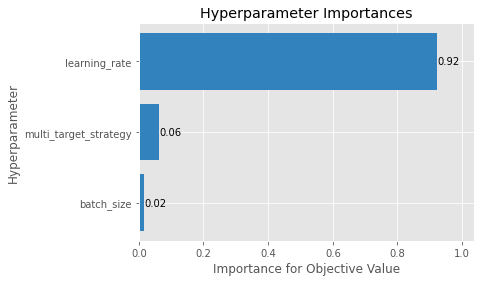

In [ ]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(best.backend);

# Model Training & Evalutation(based on hyperparameters from search)

In [ ]:
#Apply the best parameters to the model
hyp_trainer.apply_hyperparameters(best.hyperparameters, final_model=True)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
hyp_trainer.train()

Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

In [ ]:
hyp_metrics = hyp_trainer.evaluate()

Applying column mapping to evaluation dataset
***** Running evaluation *****


In [ ]:
print(f"train dataset: {len(t_dataset)} samples")
print(f"accuracy: {hyp_metrics['accuracy']}")

train dataset: 512 samples
accuracy: 0.621


We got better accuracy with hyper parameter search approach

#Push the model to hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
hyp_trainer.push_to_hub(f"setfit-mbti-multiclass-w266")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:42: FutureWarning: Deprecated positional argument(s) used in 'push_to_hub': pass repo_path_or_name='setfit-mbti-multiclass-w266', repo_url=None, commit_message='Add SetFit model', organization=None, private=None, api_endpoint=None, token=None, git_user=None, git_email=None, config=None, skip_lfs_files=False as keyword args. From version 0.12 passing these as positional arguments will result in an error,
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in 'push_to_hub': repo_path_or_name. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)
Cloning https://huggingface.co/shrinivasbjoshi/setfit-mbti-multiclass-w266 into local empty directory.


Upload file pytorch_model.bin:   0%|          | 3.34k/418M [00:00<?, ?B/s]

Upload file model_head.pkl:   3%|3         | 3.34k/103k [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/shrinivasbjoshi/setfit-mbti-multiclass-w266
   1abeccf..e2fca72  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/shrinivasbjoshi/setfit-mbti-multiclass-w266
   1abeccf..e2fca72  main -> main



'https://huggingface.co/shrinivasbjoshi/setfit-mbti-multiclass-w266/commit/e2fca7216f86a80d8371943b49fcd771d28f4cce'

#Import the model from huggingface

In [ ]:
w266_setfit_mbti = SetFitModel.from_pretrained("shrinivasbjoshi/setfit-mbti-multiclass-w266")

Downloading:   0%|          | 0.00/662 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/662 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/106k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/106k [00:00<?, ?B/s]

#testing

In [ ]:
results_dict={}
test_mbti_data = read_parquet_google_cloud('test_mbti_data.parquet')
test_mbti_labels = read_parquet_google_cloud('test_mbti_labels.parquet')
test_mbti_data, test_mbti_labels = test_mbti_data[:5000], test_mbti_labels[:5000]

In [ ]:
test_mbti_data = add_features(test_mbti_data)

In [ ]:
test_labels = test_mbti_labels['MBTI Type'].map(valid_MBTI).values.tolist()
nptest_labels = np.asarray(test_labels)

In [ ]:
# test_mbti_data

In [ ]:
input_comment=test_mbti_data['combined'].values.astype(str).tolist()

In [ ]:
len(input_comment)

5000

In [ ]:
predictions = w266_setfit_mbti.predict(input_comment)

In [ ]:
len(predictions)

5000

In [ ]:
predictions[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
multiclass_predictions = np.argmax(predictions,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score, precision_score, f1_score,matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
valid_MBTI

{'ISTJ': 0,
 'INTJ': 1,
 'ESTJ': 2,
 'ENTJ': 3,
 'ENTP': 4,
 'INTP': 5,
 'ISTP': 6,
 'ESTP': 7,
 'ISFJ': 8,
 'INFJ': 9,
 'ESFJ': 10,
 'ENFJ': 11,
 'ENFP': 12,
 'INFP': 13,
 'ISFP': 14,
 'ESFP': 15}

              precision    recall  f1-score   support

        ISTJ       0.01      0.10      0.02        92
        INTJ       0.01      0.00      0.01       691
        ESTJ       0.00      0.00      0.00       125
        ENTJ       0.00      0.00      0.00       215
        ENTP       0.00      0.00      0.00       493
        INTP       0.03      0.01      0.01       706
        ISTP       0.05      0.03      0.04       208
        ESTP       0.53      0.96      0.68        79
        ISFJ       0.00      0.02      0.01        65
        INFJ       0.08      0.10      0.09       477
        ESFJ       0.00      0.00      0.00       120
        ENFJ       0.00      0.00      0.00       147
        ENFP       0.02      0.00      0.01       598
        INFP       0.04      0.01      0.02       675
        ISFP       0.00      0.00      0.00       201
        ESFP       0.00      0.00      0.00       108

    accuracy                           0.03      5000
   macro avg       0.05   

Text(159.0, 0.5, 'True')

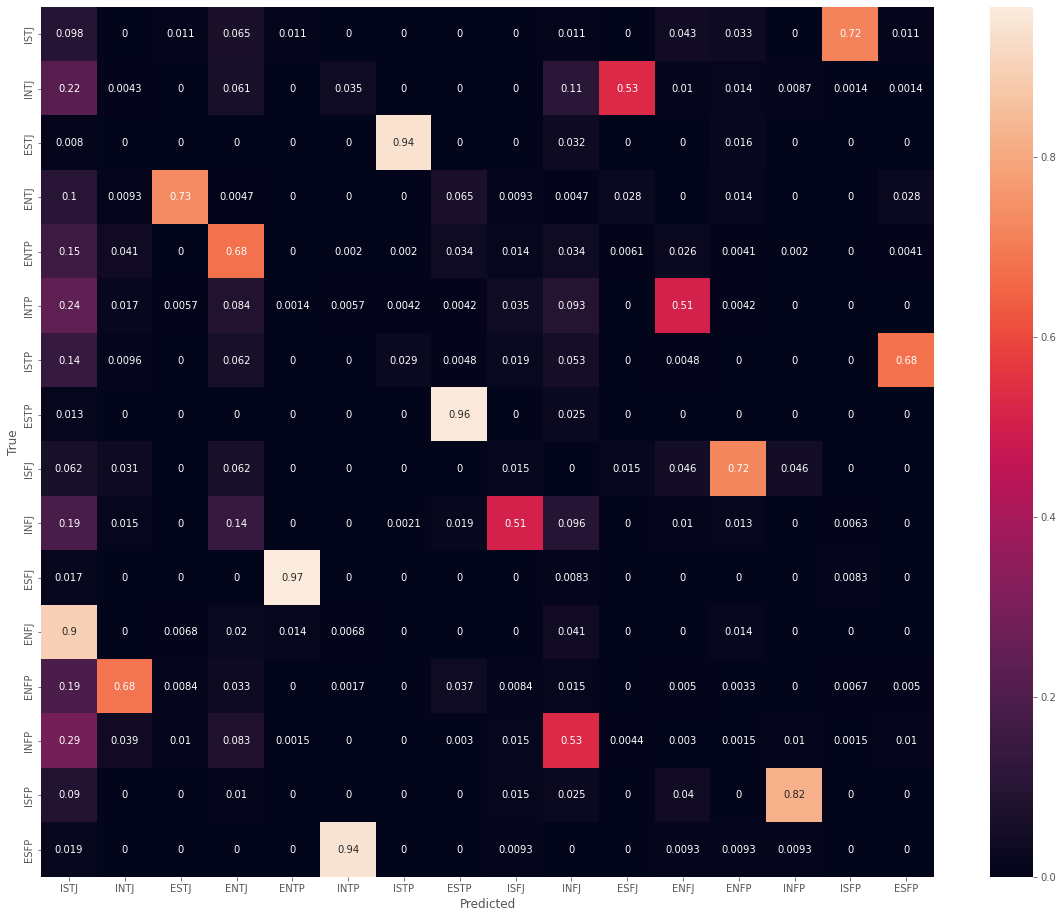

In [ ]:
print(classification_report(nptest_labels, multiclass_predictions,target_names=valid_MBTI))
cr_multi = classification_report(nptest_labels, multiclass_predictions, target_names=valid_MBTI)

cm_multi = confusion_matrix(nptest_labels, multiclass_predictions)
cm_multi = cm_multi/cm_multi.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(20,16))
sns.heatmap(
      cm_multi, annot=True,
      xticklabels=valid_MBTI,
      yticklabels=valid_MBTI)
plt.xlabel("Predicted")
plt.ylabel("True")

#with differential head (not functioning currently)

In [ ]:
num_classes = 16
model_id = "sentence-transformers/paraphrase-mpnet-base-v2"

In [ ]:
best

BestRun(run_id='6', objective=0.623, hyperparameters={'learning_rate': 6.593044075161717e-05, 'batch_size': 16, 'multi_target_strategy': 'multi-output'}, backend=<optuna.study.study.Study object at 0x7f22e886fc90>)

In [ ]:
model_diff = SetFitModel.from_pretrained(
        model_id, multi_target_strategy='multi-output',use_differentiable_head=True, head_params={"out_features": num_classes}
    )

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
trainer_diff = SetFitTrainer(
    model=model_diff,
    train_dataset=t_dataset,
    eval_dataset=v_dataset,
    loss_class=CosineSimilarityLoss,
    metric="accuracy",
    num_iterations=20,
    batch_size=16,
    column_mapping={"combined": "text", "label": "label"},
)

# trainer = SetFitTrainer(
#     model=model,
#     train_dataset=t_dataset,
#     eval_dataset=v_dataset,
#     loss_class=CosineSimilarityLoss,
#     metric="accuracy",
#     batch_size=8,
#     num_iterations=20, # The number of text pairs to generate for contrastive learning
#     num_epochs=1, # The number of epochs to use for constrastive learning
#     column_mapping={"combined": "text", "label": "label"},
#     #max_seq_length =750,
#     #lr = 0.00005
# )

In [ ]:
trainer_diff.freeze()
trainer_diff.train(body_learning_rate=6.593044075161717e-05, num_epochs=1)

Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 1280
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1280 [00:00<?, ?it/s]

In [ ]:
trainer_diff.unfreeze(keep_body_frozen=True)

In [ ]:
trainer_diff.evaluate()

Applying column mapping to evaluation dataset
***** Running evaluation *****


ValueError: ignored

In [ ]:
trainer_diff.train(learning_rate=1e-2, num_epochs=50)

Applying column mapping to training dataset


Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
#with differential head 
model_id = "sentence-transformers/paraphrase-mpnet-base-v2"

def make_model_diff(params=None):
    multi_target_strategy = params["multi_target_strategy"] if params else "one-vs-rest"
    return SetFitModel.from_pretrained(
        model_id, multi_target_strategy=multi_target_strategy,use_differentiable_head=True, head_params={"out_features": num_classes}
    )

In [ ]:
hyp_trainer_diff = SetFitTrainer(
    model_init= make_model_diff,
    train_dataset= t_dataset,
    eval_dataset= v_dataset,
    loss_class= CosineSimilarityLoss,
    num_epochs=1,
    num_iterations=20,
    column_mapping={"combined": "text", "label": "label"},
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
def hyperparameter_diff_search_function(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True),
        "batch_size": trial.suggest_categorical("batch_size", [4,8,16]),
        "multi_target_strategy": trial.suggest_categorical("multi_target_strategy", ["one-vs-rest", "multi-output", "classifier-chain"])
    }

In [ ]:
best_diff = hyp_trainer_diff.hyperparameter_search(hyperparameter_diff_search_function, n_trials=10)
best_diff

[I 2022-11-29 04:11:02,263] A new study created in memory with name: no-name-6769acd5-d0e4-415e-997d-c39965640ee6
Trial: {'learning_rate': 0.00016300233800043733, 'batch_size': 8, 'multi_target_strategy': 'classifier-chain'}
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to training dataset
***** Running training *****
  Num examples = 20480
  Num epochs = 1
  Total optimization steps = 2560
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/2560 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****
[W 2022-11-29 04:26:41,576] Trial 0 failed because of the following error: ValueError("Module inputs don't match the expected format.\nExpected format: {'predictions': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'references': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)},\nInput predictions: [13 13 13 ... 13 13 13],\nInput references: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], ..., [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.7/dist-packages/setfit/integrat

ValueError: ignored